In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fft import rfft,rfftfreq,irfft

In [31]:
# Folder es la carpeta en donde estan los .txt que se sacan del monitor del arduino

folder = "Raw Data Drag/"
files = np.sort(glob.glob(folder+'*.txt'))

In [32]:
# en calibrationData va el nombre del archivo que 
calibrationfile = "CalibrationData.txt"
calibrationData=open(calibrationfile,"w")
calibrationData.write('txt,Media_Lift,Media_Drag,STD Lift,STD Drag\n');

D00.txt
D10.txt
D30.txt
D60.txt
D80.txt


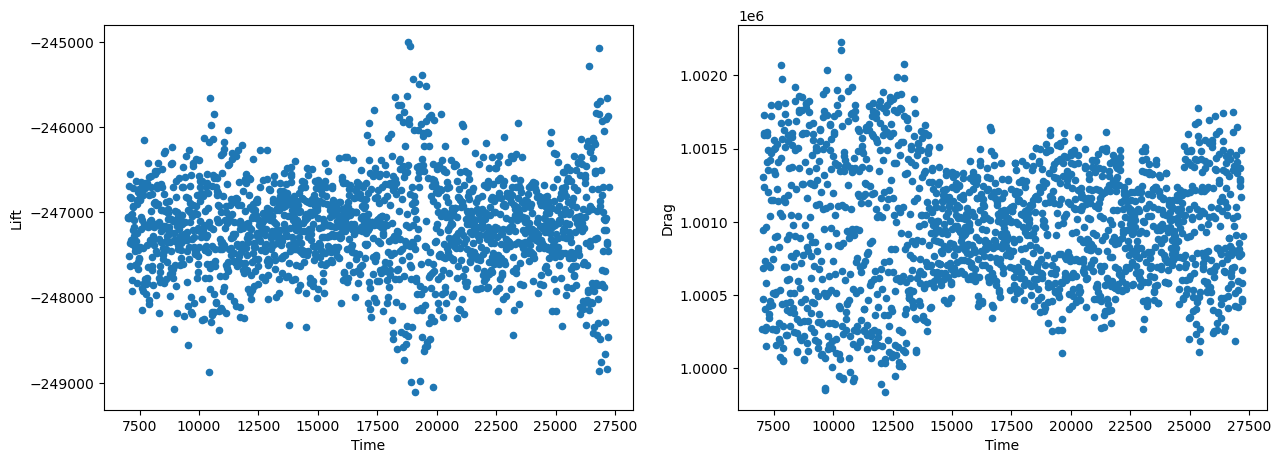

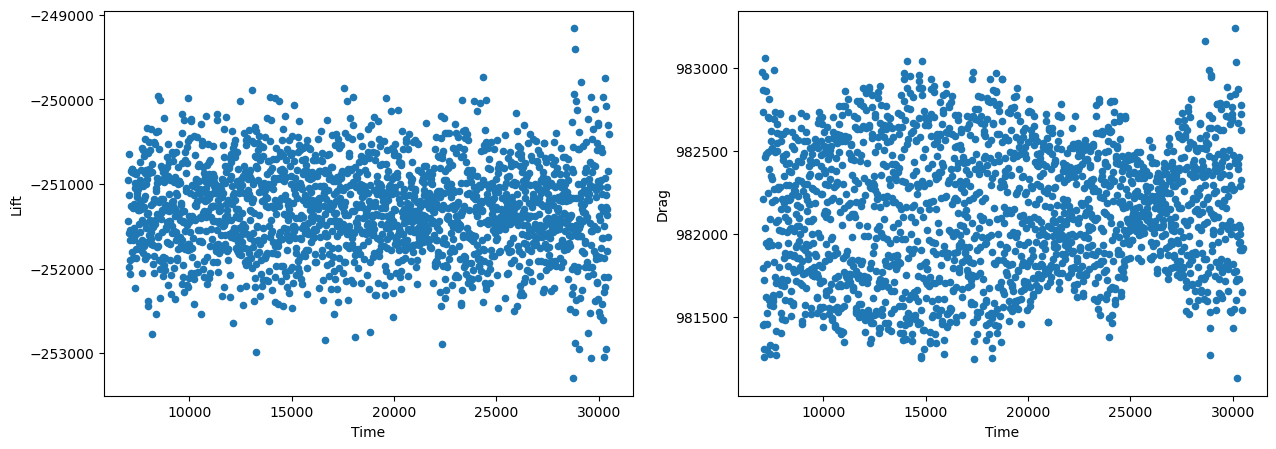

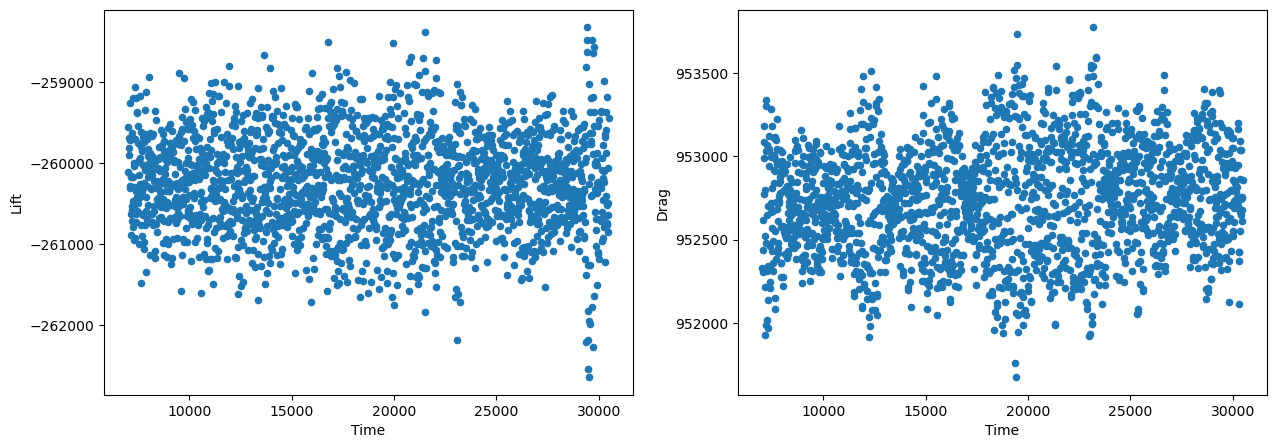

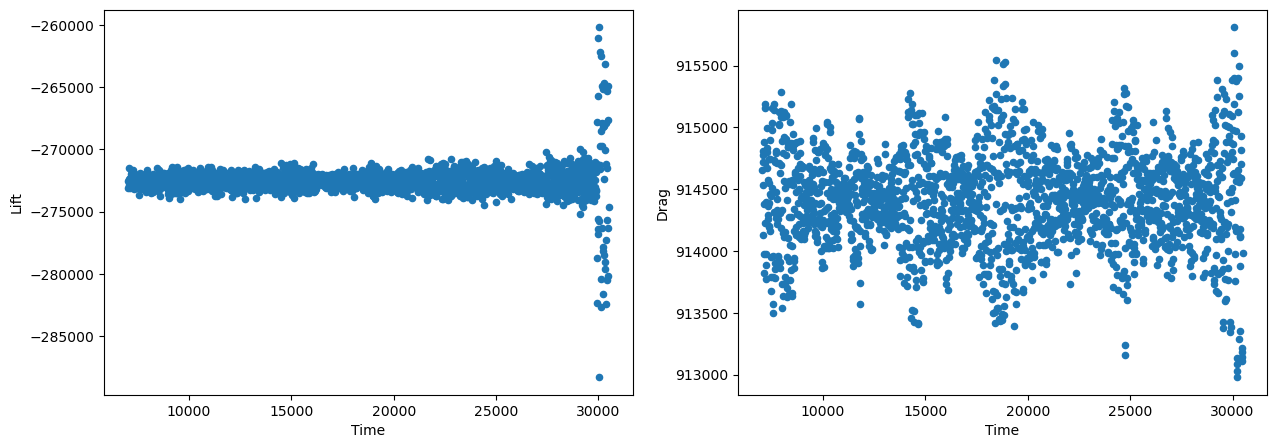

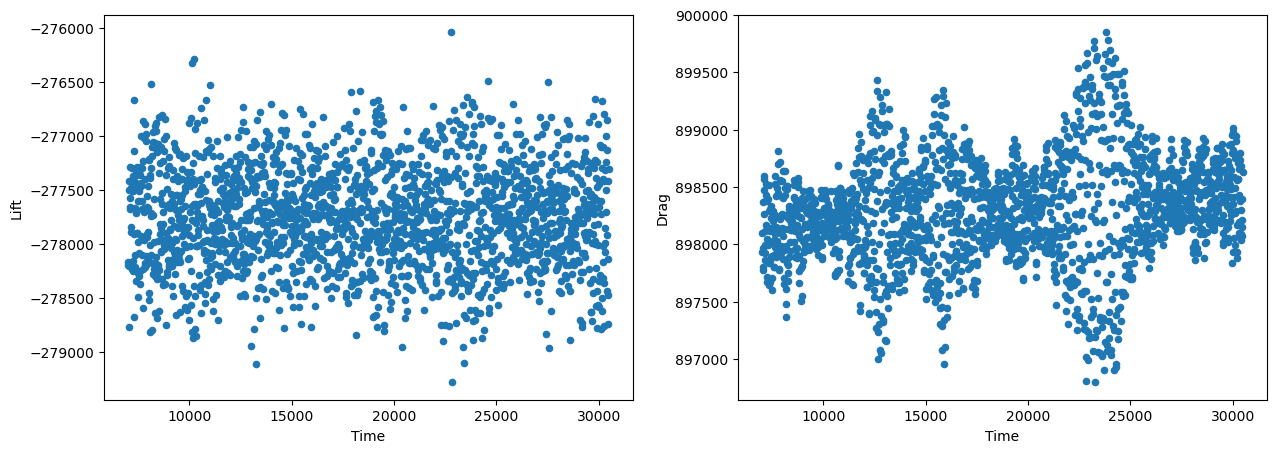

In [33]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[500:2500]
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    df=datos
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+4*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-4*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+4*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-4*stdDrag):
            df["Drag"][i]=np.nan
            
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+4*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-4*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+4*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-4*stdDrag):
            df["Drag"][i]=np.nan
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    tag=k.split('\\')[1]
    print(tag)
   
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(tag+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    

In [34]:
tag

'D80.txt'

In [35]:
A = pd.read_csv(calibrationfile)
A

,txt,Media_Lift,Media_Drag,STD Lift,STD Drag
0,D00.txt,-247175,1000945,547,436
1,D10.txt,-251303,982138,538,398
2,D30.txt,-260242,952734,593,321
3,D60.txt,-272548,914410,1218,372
4,D80.txt,-277755,898293,467,445


<function matplotlib.pyplot.show(close=None, block=None)>

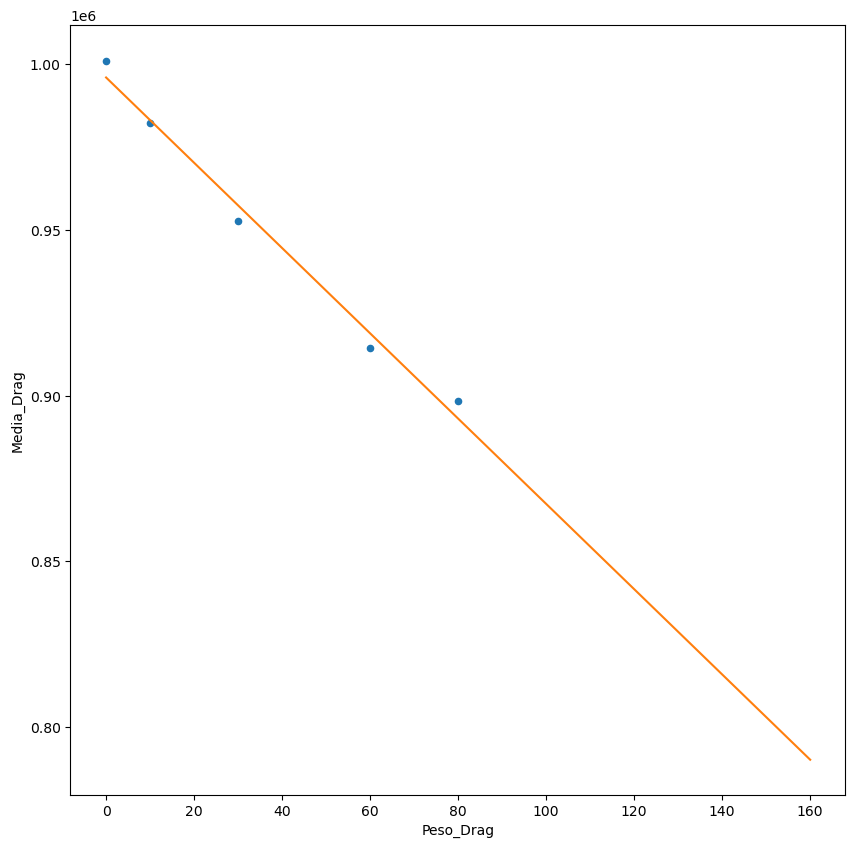

In [36]:
valores_masa_drag = pd.Series([0,10,30,60,80])
A["Peso_Drag"]=valores_masa_drag
A["Error Masa"]=0.1

polyline = np.linspace(0, 160, num=160)

PoliDrag = np.polyfit(A["Peso_Drag"].values,A["Media_Drag"].values,1)

ajuste_drag = np.poly1d(PoliDrag)

A.plot.scatter(y="Media_Drag", x="Peso_Drag", yerr="STD Drag", xerr="Error Masa")
plt.plot(polyline, ajuste_drag(polyline))
#plt.figure(figsize=(15, 15), dpi=150)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show




In [39]:
PoliDrag

array([ -1286.56637168, 996020.38938053])

In [ ]:
valores_masa_lift = np.array([0,10.26,118.86,147.98,30.29,50.26])

LiftCal["Peso_lift"]=valores_masa_lift
LiftCal["Error Masa"]=0.1

PoliLift = np.polyfit(LiftCal["Peso_lift"],LiftCal["Media_Lift"],1)

ajuste_lift = np.poly1d(PoliLift)

LiftCal.plot.scatter(y="Media_Lift", x="Peso_lift", yerr="STD Lift", xerr="Error Masa")
plt.plot(polyline, ajuste_lift(polyline))
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show


In [24]:
df

,Lift,Drag,Time
800,-311973.0,780104.0,18289.0
801,-313432.0,779924.0,18301.0
802,-312508.0,779764.0,18313.0
803,-312783.0,779634.0,18325.0
804,-312754.0,779585.0,18336.0
...,...,...,...
2762,-312171.0,780484.0,41379.0
2763,-312907.0,780361.0,41391.0
2764,-313198.0,780200.0,41402.0
2765,-311861.0,780172.0,41414.0


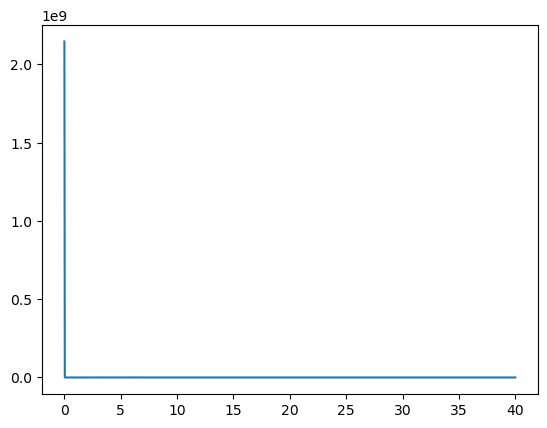

In [71]:
datos = pd.read_csv('Calibracion de balanza/Raw Data\\010.00.txt', sep=",", header=None,skiprows=5)
df2=pd.DataFrame()
datos = datos[:-100]
datos.columns = ["Lift", "Drag", "Time"]
datos = datos.astype(float)
datos=datos[800:3000]
df2["Drag"]=datos["Drag"]
step=1/80
n=len(df2["Drag"].values)
yf=rfft(df2["Drag"].values)
xf= rfftfreq(n,step)
plt.plot(xf,np.abs(yf))

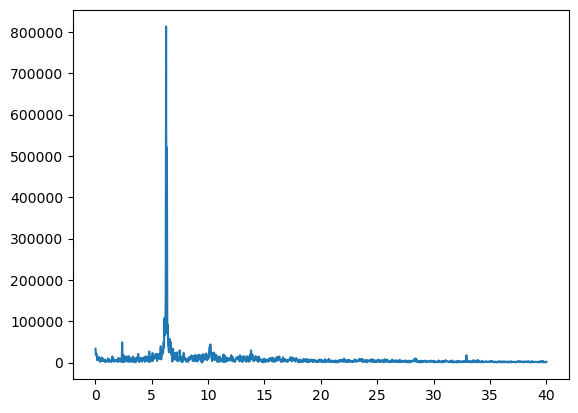

In [84]:
yf_abs=np.abs(yf)
indices =yf_abs>0 
yf_clean = yf*indices
plt.plot(xf[1:],abs(yf_clean[1:]))

In [110]:
yf_abs=np.abs(yf)
indices =[]
aaaa=0
v=xf[1]

In [111]:
for i in yf_abs:
    if aaaa<5:
        a=True
    else:
        if aaaa>9:
            a=True
        else:
            a=False
    indices.append(a)
    aaaa=aaaa+v
    


In [ ]:
yf_clean = yf*indices
plt.plot(xf[1:],abs(yf_clean[1:]))

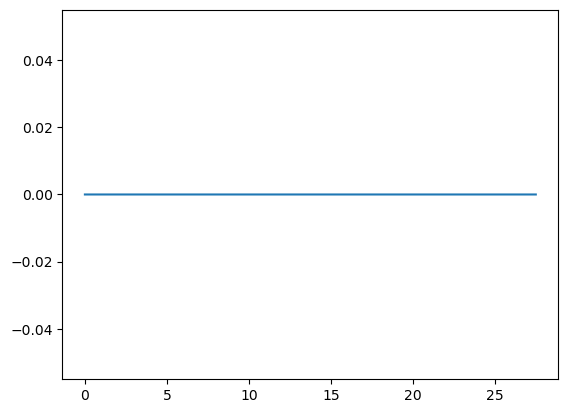

In [76]:
new_f_clean = irfft(yf_clean)
t=np.arange(0,(n)/80,1/80)
plt.plot(t,new_f_clean)

<AxesSubplot:xlabel='Time', ylabel='Drag'>

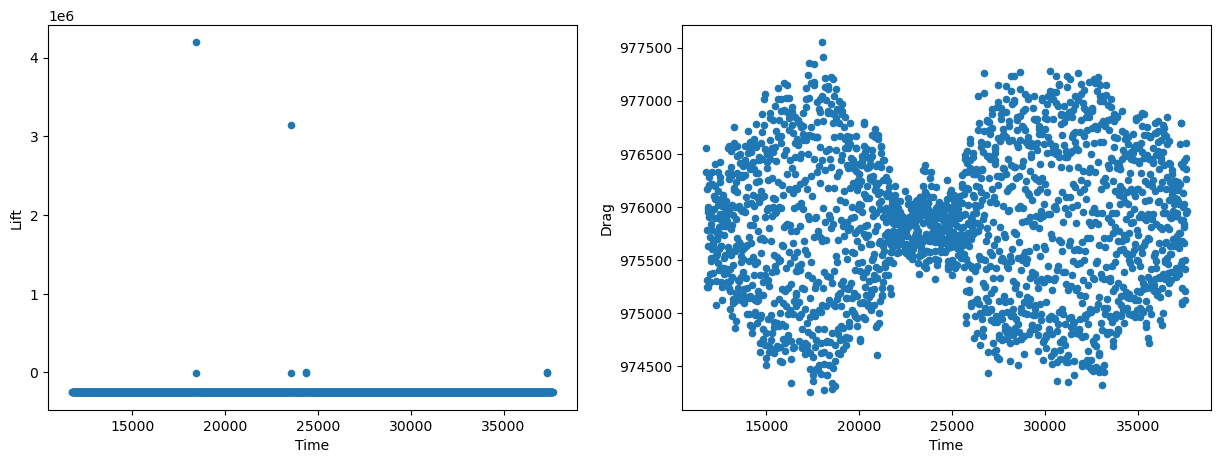

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 5)
datos.plot.scatter(ax=axes[0],x="Time", y="Lift")
datos.plot.scatter(ax=axes[1],x="Time", y="Drag")

005.00
010.00
020.00
030.00
050.00
070.00
080.00
085.00
100.00
135.00


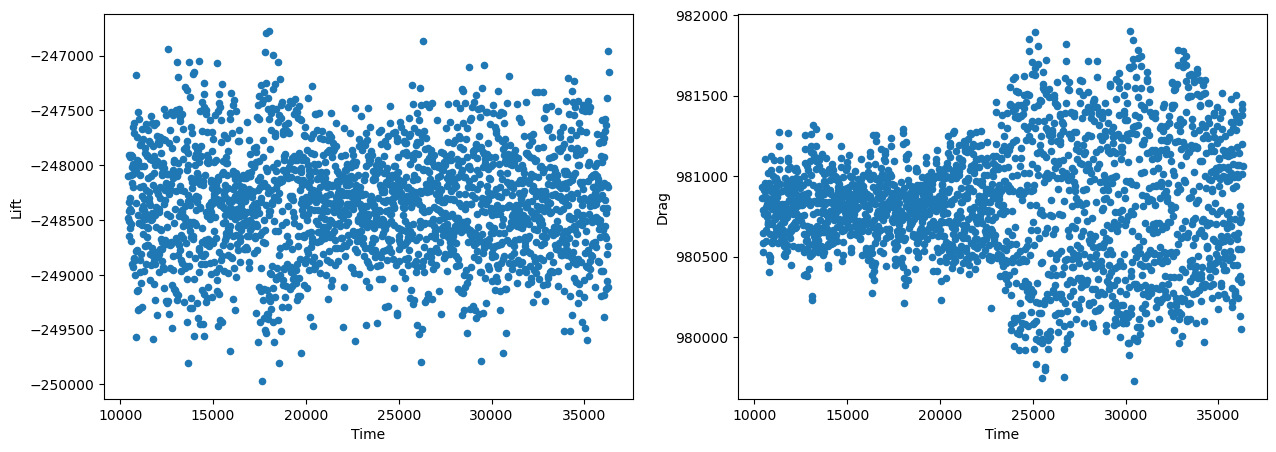

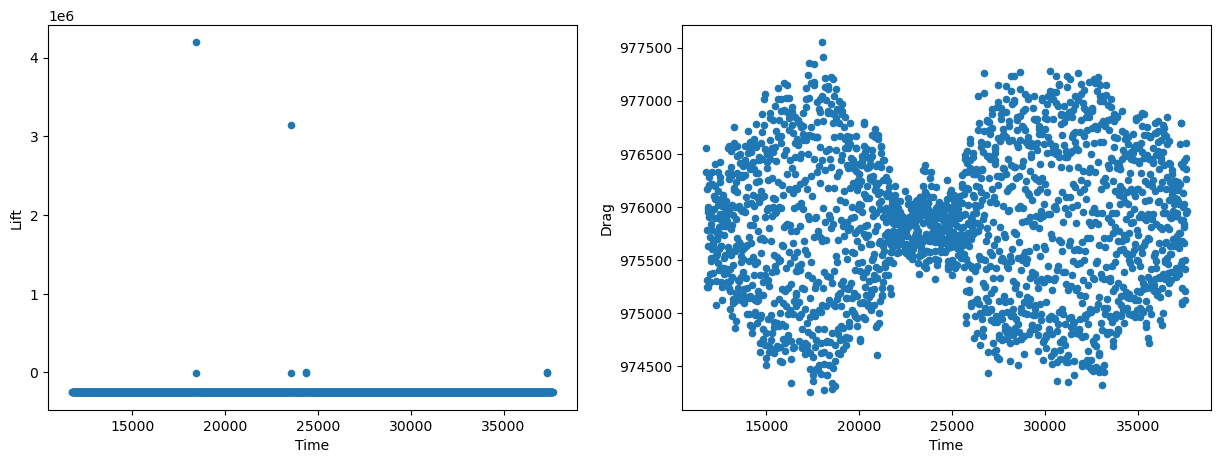

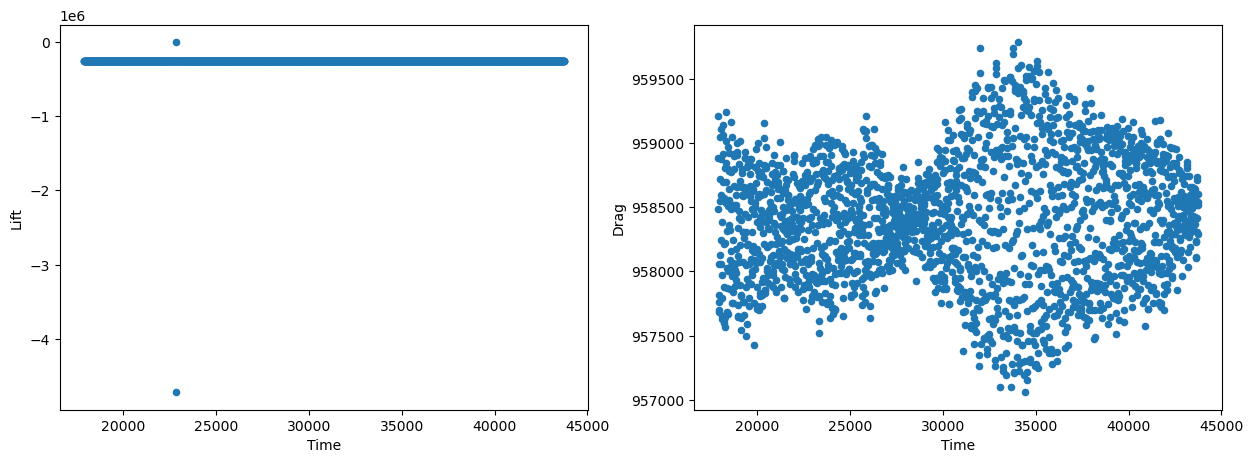

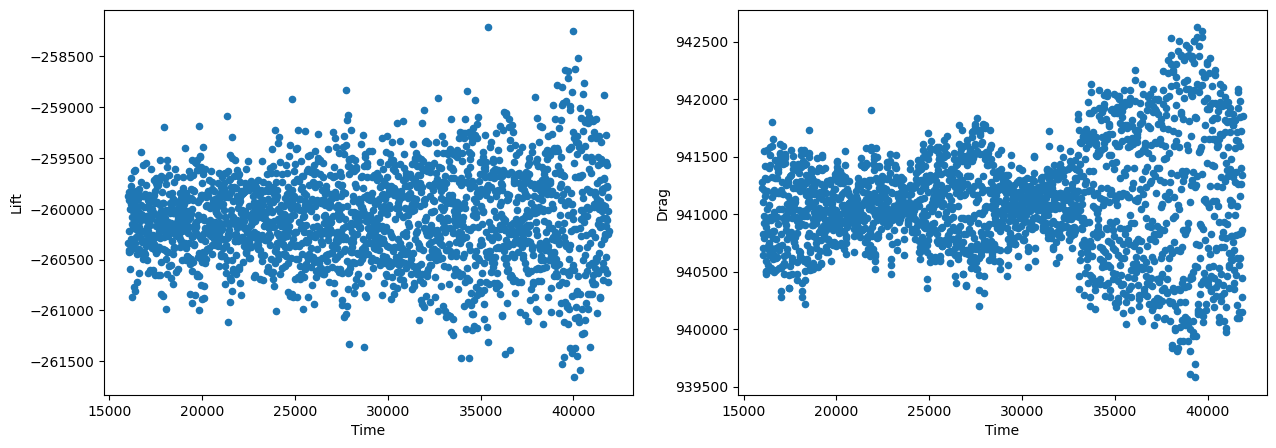

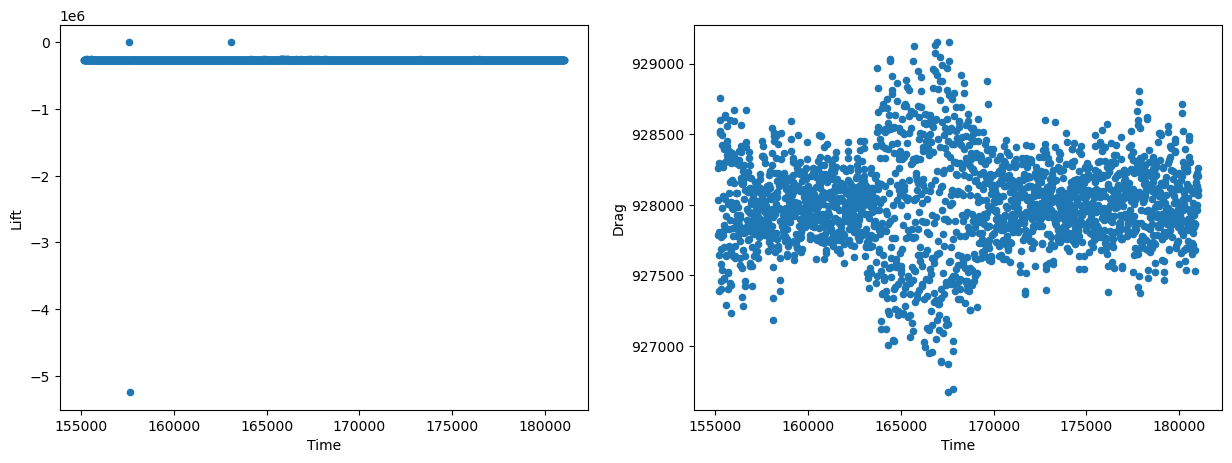

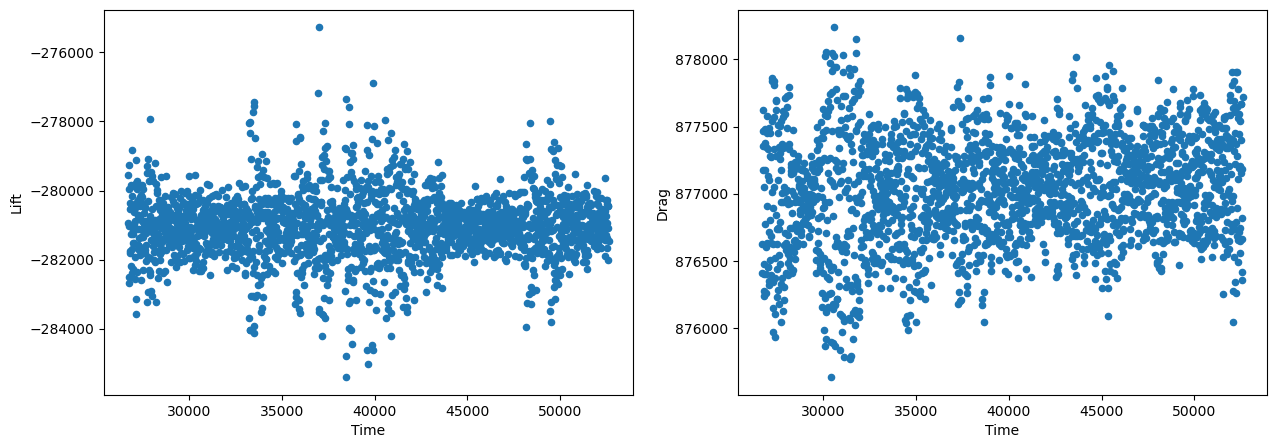

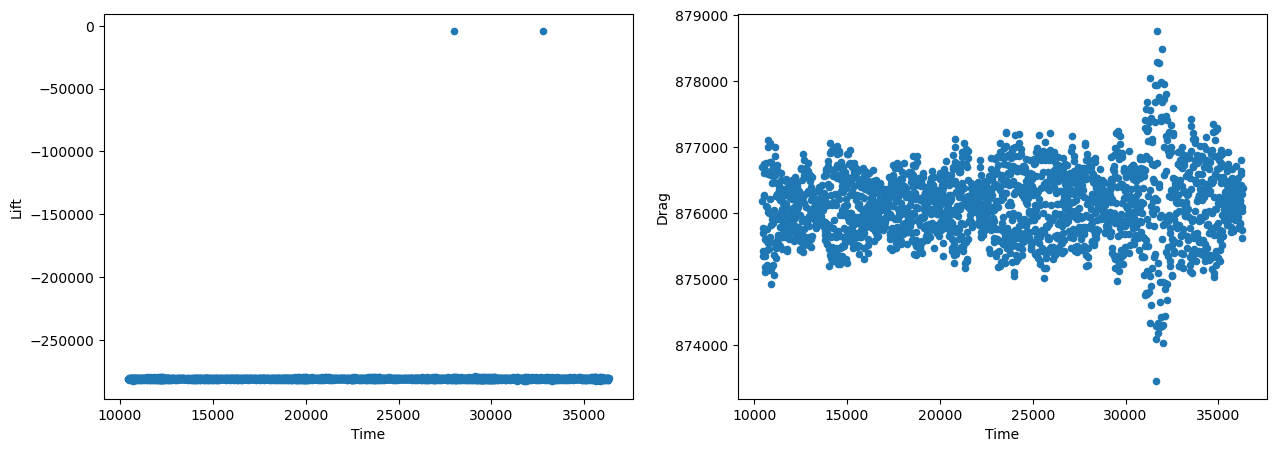

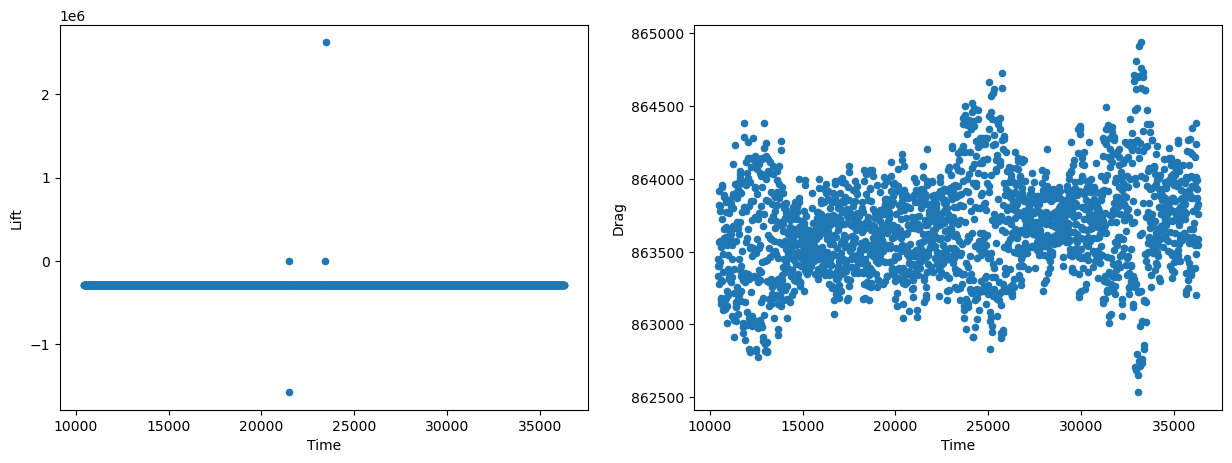

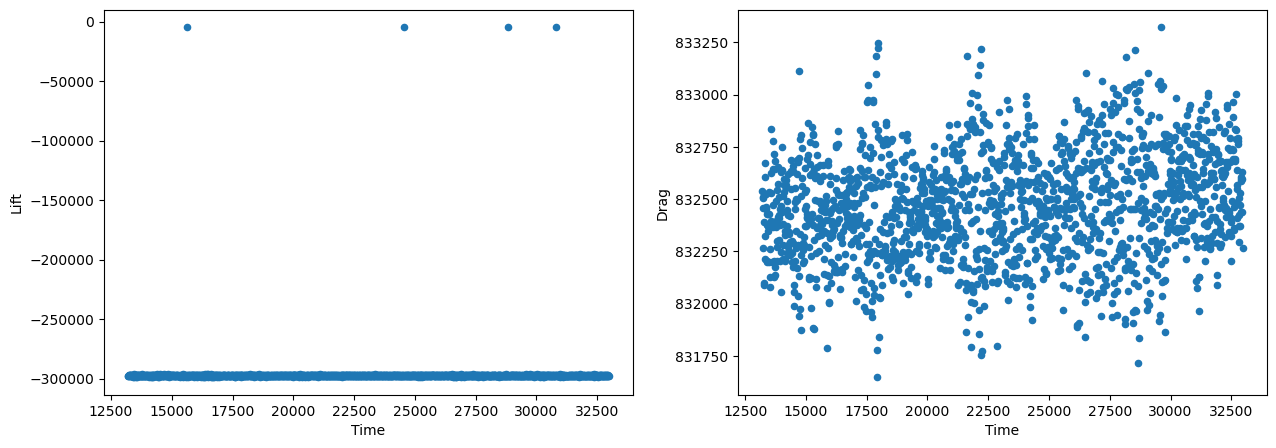

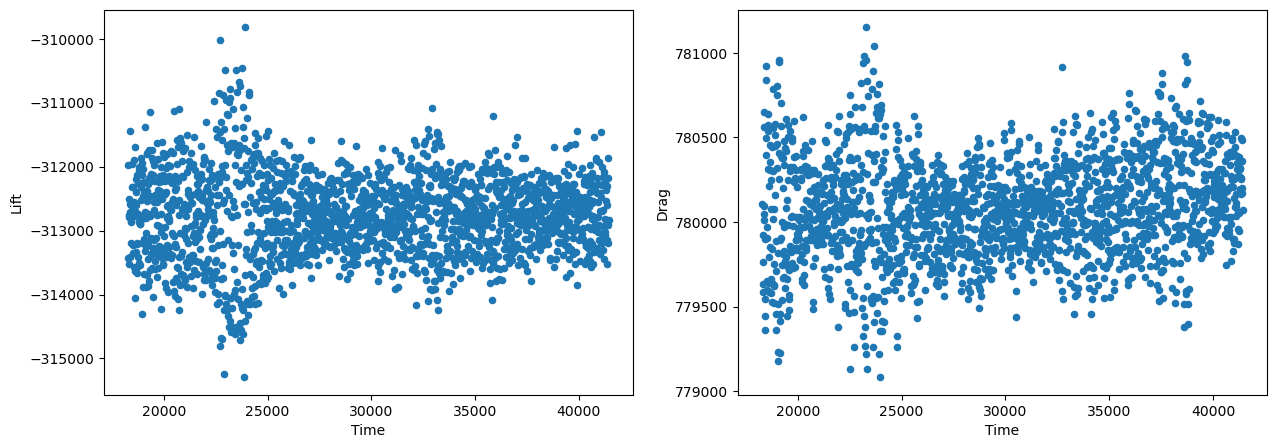

In [55]:
folder = "Calibracion de balanza/Raw Data/"
files = np.sort(glob.glob(folder+'*.txt'))

for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[800:3000]
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    datos.plot.scatter(ax=axes[0],x="Time", y="Lift")
    datos.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    tag=k.split('/')[1]
    tag2=tag[9:]
    tag3=tag2[:-4]
    print(tag3)

In [30]:
files

array(['Calibracion de balanza/Raw Data\\005.00.txt',
       'Calibracion de balanza/Raw Data\\010.00.txt',
       'Calibracion de balanza/Raw Data\\020.00.txt',
       'Calibracion de balanza/Raw Data\\030.00.txt',
       'Calibracion de balanza/Raw Data\\050.00.txt',
       'Calibracion de balanza/Raw Data\\070.00.txt',
       'Calibracion de balanza/Raw Data\\080.00.txt',
       'Calibracion de balanza/Raw Data\\085.00.txt',
       'Calibracion de balanza/Raw Data\\100.00.txt',
       'Calibracion de balanza/Raw Data\\135.00.txt'], dtype='<U42')

In [56]:
datos = pd.read_csv('Calibracion de balanza/Raw Data\\010.00.txt', sep=",", header=None,skiprows=5)

In [54]:
datos

,0,1,2
0,-247978.0,980669.0,1021
1,-247728.0,980744.0,1033
2,-248457.0,981038.0,1044
3,-248191.0,981175.0,1055
4,-248662.0,981330.0,1068
...,...,...,...
3778,-247847.0,981151.0,45466
3779,-247904.0,981457.0,45477
3780,-248252.0,981648.0,45490
3781,-248660.0,981711.0,45501


In [108]:
aaaa

array([0.00000000e+00, 3.63636364e-02, 7.27272727e-02, ...,
       3.99272727e+01, 3.99636364e+01, 4.00000000e+01])

In [ ]:
yf_abs=np.abs(yf)
indices =[]
frec=0
cuenta=0
v=xf[1]
for i in yf_abs:
    if frec<
yf_clean = yf*indices
plt.plot(xf[1:],abs(yf_clean[1:]))